In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dropout, Dense, Conv2D, Flatten, MaxPooling2D,AveragePooling2D, Input, Dense, Conv2D, Flatten
from keras.models import Model, Sequential
from keras.utils import to_categorical

# Helper libraries
import numpy as np
import random
from math import ceil 
from IPython.display import Markdown,display

from scipy import signal
from scipy import misc

# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

C:\Users\kheniv\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kheniv\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kheniv\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kheniv\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:
plt.rcParams["figure.figsize"] = (15,10)
print(tf.__version__)

1.14.0


A simple plotting routine to show grey-scale images.

In [3]:
def plotGreyScaleImage(image, ax=None, title=None, hide_axis=True, show_grid=False, vmin=None, vmax=None):
    # create new plot, if no ax is given
    if ax is None: ax = plt.subplot(1,1,1)
    if hide_axis: ax.set_axis_off()
    if title: ax.set_title(title)
    # plot the image
    im=ax.imshow(image, cmap='gray',vmin=vmin, vmax=vmax)
    plt.grid(show_grid)
    # add the colorbar to the plot ...
    cax = make_axes_locatable(ax).append_axes('right', size='5%', pad=0.05)
    plt.colorbar(im,cax=cax)

# Lets get back to the MNIST dataset ...

In [4]:
data = keras.datasets.mnist
(tr_X, tr_l), (te_X, te_l) = data.load_data()
tr_X = tr_X / 255.0
te_X = te_X / 255.0

tr_X = tr_X.reshape(60000,28,28,1)
te_X = te_X.reshape(10000,28,28,1)

tr_Y = to_categorical(tr_l)
te_Y = to_categorical(te_l)

In [5]:
#create model

num_features = 5
kernel_size = 3

title1 = "Model 1 - One Convolutional Layer"
model1 = Sequential()
model1.add(Conv2D(num_features, kernel_size=kernel_size, activation='relu', input_shape=(28,28,1), strides=1))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))


In [6]:
#compile model using accuracy to measure model performance
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', 'mean_squared_error'])

In [7]:
#train the model
history1 = model1.fit(tr_X, tr_Y, validation_data=(te_X, te_Y), epochs=10, batch_size=1024)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.9187 - categorical_accuracy: 0.7760 - mean_squared_error: 0.0397 - val_loss: 0.3974 - val_categorical_accuracy: 0.8944 - val_mean_squared_error: 0.0172
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.3532 - categorical_accuracy: 0.9006 - mean_squared_error: 0.0155 - val_loss: 0.3037 - val_categorical_accuracy: 0.9152 - val_mean_squared_error: 0.0133
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.2935 - categorical_accuracy: 0.9167 - mean_squared_error: 0.0129 - val_loss: 0.2708 - val_categorical_accuracy: 0.9212 - val_mean_squared_error: 0.0118
Epoch 4/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2636 - categorical_accuracy: 0.9253 - mean_squared_error: 0.0115 - val_loss: 0.2469 - val_categorical_accuracy: 0.9285 - val_mean_squared_error: 0.0108
Epoch 5/10
60000/

---
# Analysing the size of the network
First, we look at input and output of the model.
It should accept 28x28 images with 1 channel and output a distribution over the 10 classes.
I.e., the input tensor should have the shape `(?, 28, 28, 1)` and the output should have shape `(?, 10)`.

In [8]:
print("Input: ", model1.input)
print("Output:", model1.output)

Input:  Tensor("conv2d_1_input:0", shape=(?, 28, 28, 1), dtype=float32)
Output: Tensor("dense_1/Softmax:0", shape=(?, 10), dtype=float32)


Next, we will look at the shape of the weight matrices.
The following code, will print the shape of the weight matrix for every layer. This contains the weights to the previous layer as well as the biases. Please note, the Flatten layer has no weights, but just reshapes the inputs, therefore only weights for layer `0` and `2` will be printed. In addition, a small summary of the shapes and number of trainable parameters is shown.

In [9]:
def describeNetworkStructure(model, title):
    display(Markdown("## %s" % title))
    print("Input:     ", model.input)
    print("Output:    ", model.output)
    for il,l in enumerate(model.layers):
        print("Layer %i:    %s (%s)" % (il, l.name, l.__class__.__name__))
        for iw,w in enumerate(l.get_weights()):
            print(" - Paras %i:" % iw, w.shape)

    model.summary()

describeNetworkStructure(model1, title1)

## Model 1 - One Convolutional Layer

Input:      Tensor("conv2d_1_input:0", shape=(?, 28, 28, 1), dtype=float32)
Output:     Tensor("dense_1/Softmax:0", shape=(?, 10), dtype=float32)
Layer 0:    conv2d_1 (Conv2D)
 - Paras 0: (3, 3, 1, 5)
 - Paras 1: (5,)
Layer 1:    flatten_1 (Flatten)
Layer 2:    dense_1 (Dense)
 - Paras 0: (3380, 10)
 - Paras 1: (10,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
flatten_1 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                33810     
Total params: 33,860
Trainable params: 33,860
Non-trainable params: 0
_________________________________________________________________


--- 
# Which features have been learned?

What has been learned here? Can we plot the weights to the convolutional layer as images? They correspond to the feature maps = kernel (as shown in the convolution example above).

[[ 0.17355904  0.03841174  0.4137205 ]
 [ 0.02741277 -0.21368477  0.10868606]
 [ 0.2948872   0.16655995 -0.52657974]]
[[ 0.2664613   0.41496316  0.11963635]
 [ 0.14670084  0.3590845   0.02932201]
 [ 0.17263275 -0.18929504 -0.13950521]]
[[-0.11596339  0.02733676  0.36633256]
 [-0.00303967  0.31240046  0.372963  ]
 [-0.02787352 -0.16966893  0.10645564]]
[[0.15232575 0.01243013 0.24834208]
 [0.08335841 0.42160606 0.18880506]
 [0.20850837 0.33305004 0.19191295]]
[[ 0.6581335  -0.14009883 -0.80563885]
 [-0.7818206  -0.77097416  0.08371454]
 [-0.13399428  0.3663718   0.683696  ]]


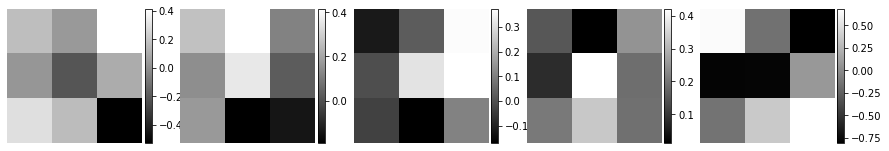

In [10]:
def visualiseKernels(model, layer=0):
    for i,im in enumerate(model.get_weights()[layer].transpose()):
        print(im[0])
        plotGreyScaleImage(im[0],  plt.subplot(1,num_features,i+1))
    plt.show()
visualiseKernels(model1)

In addition, we can also visualise the feature maps for different inputs.

Shape of the input images: (3, 28, 28, 1)
Shape of the feature maps: (3, 26, 26, 5)


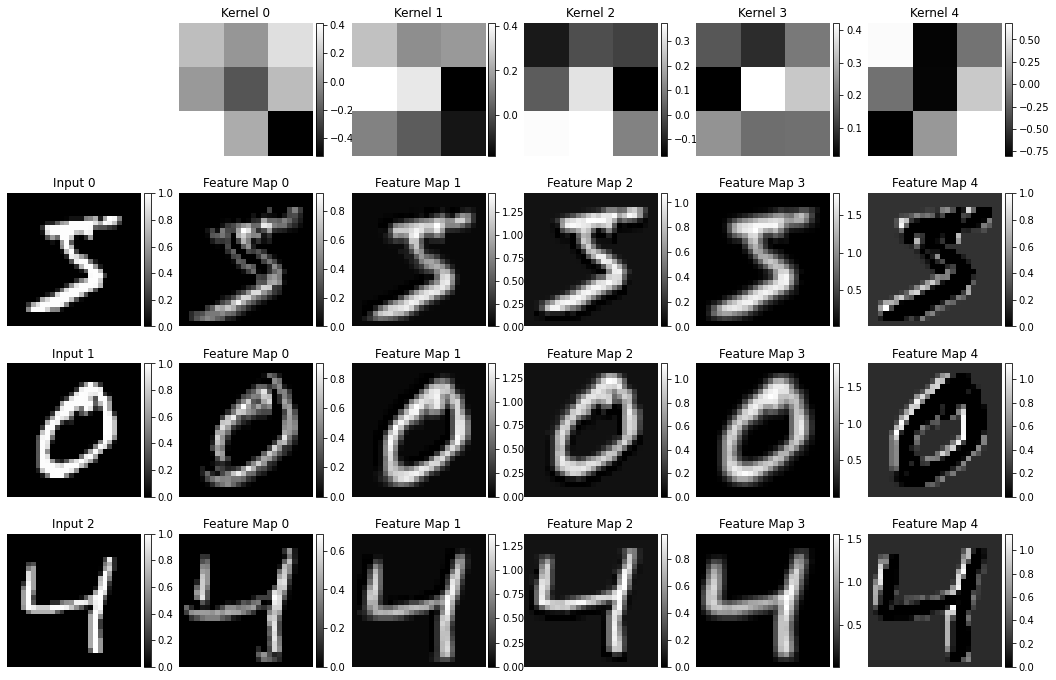

In [11]:
def visualiseFeatureMaps(model, ims, layer=0, figsize=3, normalise_colors=False):
    # create a submodel which only contains the part from input up to the given layer
    fmModel = Model(inputs=model.input, outputs=model.layers[layer].output) 

    # predict the output for the images using the submodel
    fms = fmModel.predict(ims)
    print("Shape of the input images:", ims.shape)
    print("Shape of the feature maps:", fms.shape)
    
    # get the overall bounds for colors
    (vmin,vmax)=(min(np.min(ims), np.min(fms)), max(np.max(ims), np.max(fms))) if normalise_colors else (None,None)

    # get some readable variables
    num_images = len(ims)       # number of images to process
    num_features = fms.shape[3] # number of feature maps
    num_rows = 1 + num_images   # number of input images + 1 for the kernels
    num_cols = 1 + num_features # number of feature maps + 1 for the inputs

    plt.figure(figsize=(num_cols*figsize, num_rows*figsize*1))

    # access the input-weights of the model for the given layer
    weights = model.get_weights()[layer].transpose()
    for f,ws in enumerate(weights):
        plotGreyScaleImage(ws[0].transpose(),     plt.subplot(num_rows,num_cols,f+2), title="Kernel %i" % f, vmin=vmin, vmax=vmax)

    # plot all inputs and corresponding feature maps
    for i in range(num_images):
        plotGreyScaleImage(ims[i,:,:,0], plt.subplot(num_rows,num_cols,(i+1)*num_cols+1  ), title="Input %i" % i, vmin=vmin, vmax=vmax)
        for f in range(num_features):
            plotGreyScaleImage(fms[i,:,:,f], plt.subplot(num_rows,num_cols,(i+1)*num_cols+f+2), title="Feature Map %i" % f, vmin=vmin, vmax=vmax)

    plt.show()

visualiseFeatureMaps(model1, tr_X[:3])


# Convolution with strides

In [12]:
num_features = 5
kernel_size = 3

title2 = "Model 2 - Convolutional Network with Strides"
model2 = Sequential()
model2.add(Conv2D(num_features, kernel_size=kernel_size, activation='relu', input_shape=(28,28,1), strides=2))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', 'mean_squared_error'])

describeNetworkStructure(model2, title2)

#train the model
history2 = model2.fit(tr_X, tr_Y, validation_data=(te_X, te_Y), epochs=10, batch_size=1024)


## Model 2 - Convolutional Network with Strides

Input:      Tensor("conv2d_2_input:0", shape=(?, 28, 28, 1), dtype=float32)
Output:     Tensor("dense_2/Softmax:0", shape=(?, 10), dtype=float32)
Layer 0:    conv2d_2 (Conv2D)
 - Paras 0: (3, 3, 1, 5)
 - Paras 1: (5,)
Layer 1:    flatten_2 (Flatten)
Layer 2:    dense_2 (Dense)
 - Paras 0: (845, 10)
 - Paras 1: (10,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 13, 13, 5)         50        
_________________________________________________________________
flatten_2 (Flatten)          (None, 845)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8460      
Total params: 8,510
Trainable params: 8,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
600

Shape of the input images: (5, 28, 28, 1)
Shape of the feature maps: (5, 13, 13, 5)


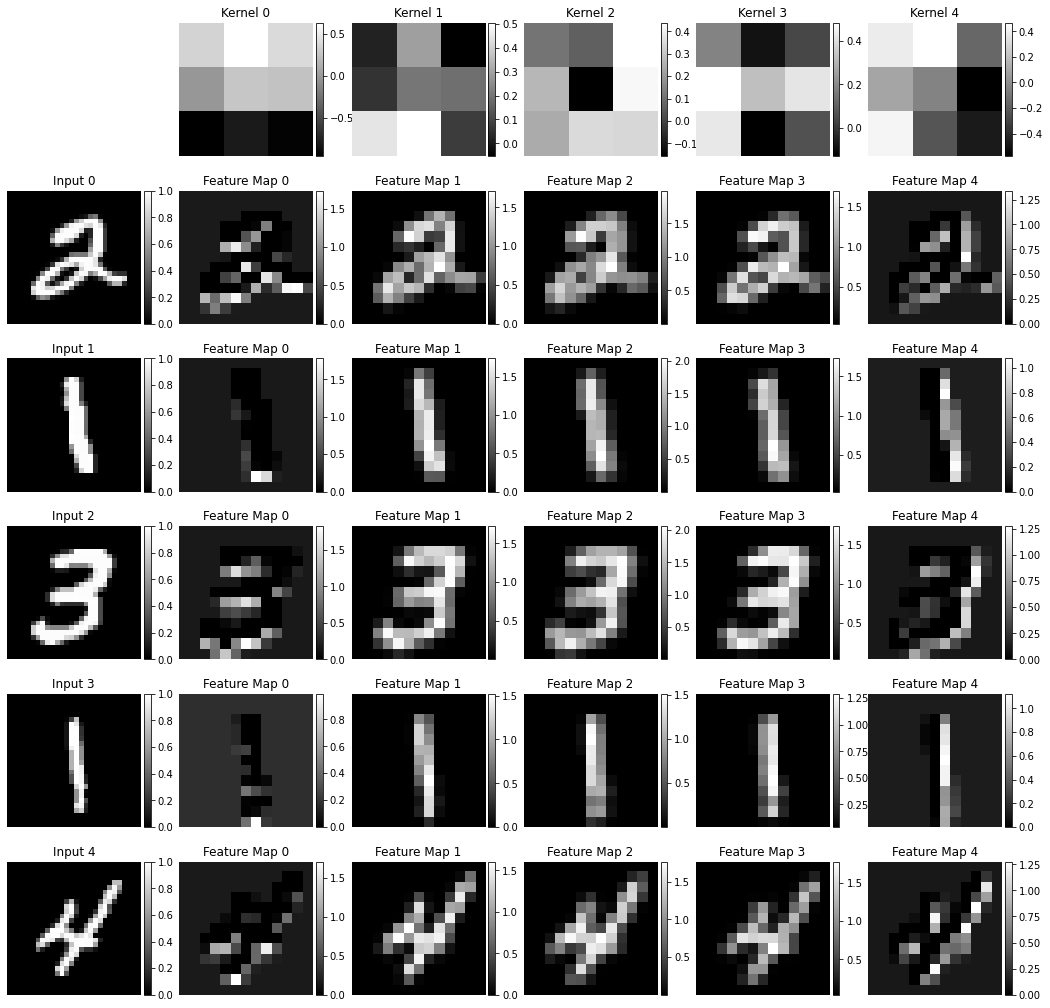

In [13]:
visualiseFeatureMaps(model2, tr_X[5:10])

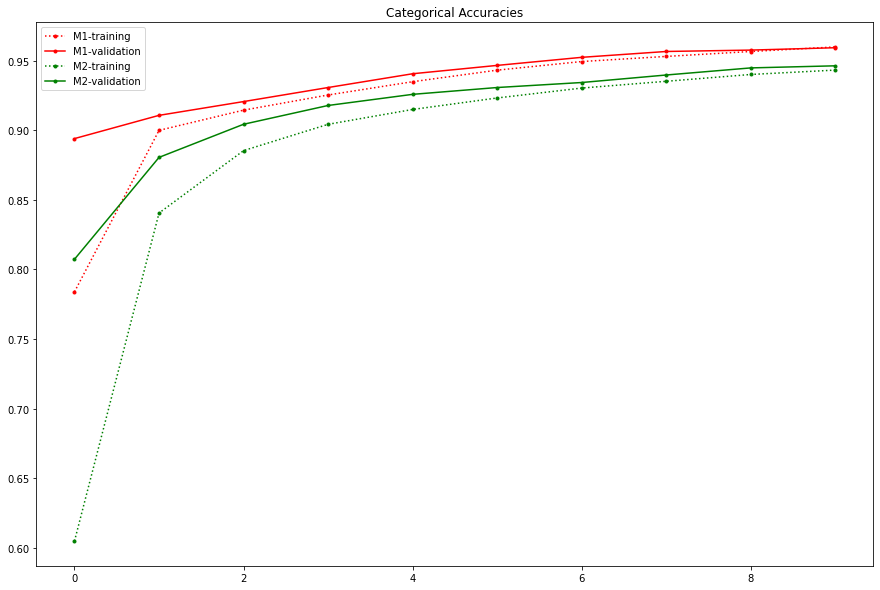

In [14]:
plt.plot(history1.history['categorical_accuracy'],     'r.:', label="M1-training")
plt.plot(history1.history['val_categorical_accuracy'], 'r.-', label="M1-validation")

plt.plot(history2.history['categorical_accuracy'],     'g.:', label="M2-training")
plt.plot(history2.history['val_categorical_accuracy'], 'g.-', label="M2-validation")

plt.title("Categorical Accuracies")
plt.legend()
plt.show()


---
# MNIST with a better CNN

In [15]:
title3 = "Large Convolutional Network"

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1), strides=1))
model3.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', strides=1))

model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model3.add(Flatten())
model3.add(Dropout(0.25))

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', 'mean_squared_error'])

describeNetworkStructure(model3, title3)

## Large Convolutional Network

Input:      Tensor("conv2d_2_input:0", shape=(None, 28, 28, 1), dtype=float32)
Output:     Tensor("dense_3/Identity:0", shape=(None, 10), dtype=float32)
Layer 0:    conv2d_2 (Conv2D)
 - Paras 0: (3, 3, 1, 32)
 - Paras 1: (32,)
Layer 1:    conv2d_3 (Conv2D)
 - Paras 0: (3, 3, 32, 64)
 - Paras 1: (64,)
Layer 2:    max_pooling2d (MaxPooling2D)
Layer 3:    flatten_2 (Flatten)
Layer 4:    dropout (Dropout)
Layer 5:    dense_2 (Dense)
 - Paras 0: (12544, 128)
 - Paras 1: (128,)
Layer 6:    dropout_1 (Dropout)
Layer 7:    dense_3 (Dense)
 - Paras 0: (128, 10)
 - Paras 1: (10,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_p

In [16]:
tr_X.shape, tr_Y.shape

((60000, 28, 28, 1), (60000, 10))

In [17]:
#train the model
history3 = model3.fit(tr_X, tr_Y, validation_data=(te_X, te_Y), epochs=10, batch_size=1024)


Epoch 1/10
59/59 [==============================] - 57s 967ms/step - loss: 0.5326 - categorical_accuracy: 0.8373 - mean_squared_error: 0.0237 - val_loss: 0.1419 - val_categorical_accuracy: 0.9564 - val_mean_squared_error: 0.0066
Epoch 2/10
59/59 [==============================] - 54s 910ms/step - loss: 0.1563 - categorical_accuracy: 0.9547 - mean_squared_error: 0.0070 - val_loss: 0.0643 - val_categorical_accuracy: 0.9788 - val_mean_squared_error: 0.0031
Epoch 3/10
59/59 [==============================] - 52s 888ms/step - loss: 0.0990 - categorical_accuracy: 0.9705 - mean_squared_error: 0.0046 - val_loss: 0.0482 - val_categorical_accuracy: 0.9846 - val_mean_squared_error: 0.0023
Epoch 4/10
59/59 [==============================] - 53s 892ms/step - loss: 0.0780 - categorical_accuracy: 0.9766 - mean_squared_error: 0.0036 - val_loss: 0.0406 - val_categorical_accuracy: 0.9860 - val_mean_squared_error: 0.0020
Epoch 5/10
59/59 [==============================] - 52s 890ms/step - loss: 0.0646 - 

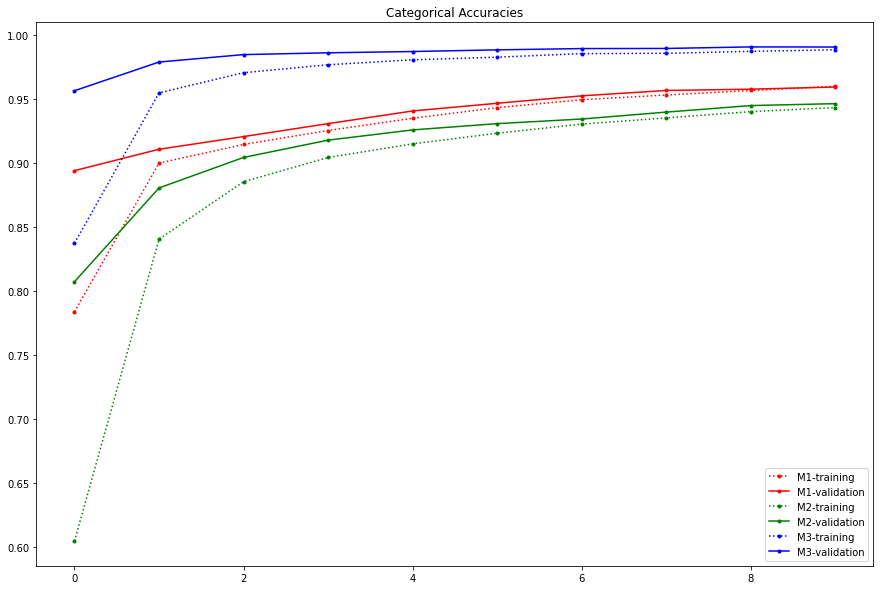

In [18]:
plt.plot(history1.history['categorical_accuracy'],     'r.:', label="M1-training")
plt.plot(history1.history['val_categorical_accuracy'], 'r.-', label="M1-validation")

plt.plot(history2.history['categorical_accuracy'],    'g.:', label="M2-training")
plt.plot(history2.history['val_categorical_accuracy'],'g.-', label="M2-validation")

plt.plot(history3.history['categorical_accuracy'],    'b.:', label="M3-training")
plt.plot(history3.history['val_categorical_accuracy'],'b.-', label="M3-validation")

plt.title("Categorical Accuracies")

plt.legend()
plt.show()


In [19]:
describeNetworkStructure(model1, title1)
describeNetworkStructure(model2, title2)
describeNetworkStructure(model3, title3)

## Model 1 - One Convolutional Layer

Input:      Tensor("conv2d_input:0", shape=(None, 28, 28, 1), dtype=float32)
Output:     Tensor("dense/Identity:0", shape=(None, 10), dtype=float32)
Layer 0:    conv2d (Conv2D)
 - Paras 0: (3, 3, 1, 5)
 - Paras 1: (5,)
Layer 1:    flatten (Flatten)
Layer 2:    dense (Dense)
 - Paras 0: (3380, 10)
 - Paras 1: (10,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 5)         50        
_________________________________________________________________
flatten (Flatten)            (None, 3380)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                33810     
Total params: 33,860
Trainable params: 33,860
Non-trainable params: 0
_________________________________________________________________


## Model 2 - Convolutional Network with Strides

Input:      Tensor("conv2d_1_input:0", shape=(None, 28, 28, 1), dtype=float32)
Output:     Tensor("dense_1/Identity:0", shape=(None, 10), dtype=float32)
Layer 0:    conv2d_1 (Conv2D)
 - Paras 0: (3, 3, 1, 5)
 - Paras 1: (5,)
Layer 1:    flatten_1 (Flatten)
Layer 2:    dense_1 (Dense)
 - Paras 0: (845, 10)
 - Paras 1: (10,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 5)         50        
_________________________________________________________________
flatten_1 (Flatten)          (None, 845)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8460      
Total params: 8,510
Trainable params: 8,510
Non-trainable params: 0
_________________________________________________________________


## Large Convolutional Network

Input:      Tensor("conv2d_2_input:0", shape=(None, 28, 28, 1), dtype=float32)
Output:     Tensor("dense_3/Identity:0", shape=(None, 10), dtype=float32)
Layer 0:    conv2d_2 (Conv2D)
 - Paras 0: (3, 3, 1, 32)
 - Paras 1: (32,)
Layer 1:    conv2d_3 (Conv2D)
 - Paras 0: (3, 3, 32, 64)
 - Paras 1: (64,)
Layer 2:    max_pooling2d (MaxPooling2D)
Layer 3:    flatten_2 (Flatten)
Layer 4:    dropout (Dropout)
Layer 5:    dense_2 (Dense)
 - Paras 0: (12544, 128)
 - Paras 1: (128,)
Layer 6:    dropout_1 (Dropout)
Layer 7:    dense_3 (Dense)
 - Paras 0: (128, 10)
 - Paras 1: (10,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_p

The following model mimics almost the LeNet Architecture.

In [20]:
title4 = "LeNet-Adaptation"
model4 = Sequential()
model4.add(Conv2D(6, kernel_size=5, padding='valid', activation='tanh', input_shape=(28,28,1), strides=1))
model4.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))

model4.add(Conv2D(16, kernel_size=5, padding='valid', activation='tanh', strides=1))
model4.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))

model4.add(Flatten())

model4.add(Dense(84, activation='tanh'))

model4.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', 'mean_squared_error'])

describeNetworkStructure(model4, title4)

## LeNet-Adaptation

Input:      Tensor("conv2d_4_input:0", shape=(None, 28, 28, 1), dtype=float32)
Output:     Tensor("dense_5/Identity:0", shape=(None, 10), dtype=float32)
Layer 0:    conv2d_4 (Conv2D)
 - Paras 0: (5, 5, 1, 6)
 - Paras 1: (6,)
Layer 1:    average_pooling2d (AveragePooling2D)
Layer 2:    conv2d_5 (Conv2D)
 - Paras 0: (5, 5, 6, 16)
 - Paras 1: (16,)
Layer 3:    average_pooling2d_1 (AveragePooling2D)
Layer 4:    flatten_3 (Flatten)
Layer 5:    dense_4 (Dense)
 - Paras 0: (256, 84)
 - Paras 1: (84,)
Layer 6:    dense_5 (Dense)
 - Paras 0: (84, 10)
 - Paras 1: (10,)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D

In [21]:
history4 = model4.fit(tr_X, tr_Y, validation_data=(te_X, te_Y), epochs=10, batch_size=1024)


Epoch 1/10
59/59 [==============================] - 6s 102ms/step - loss: 1.0267 - categorical_accuracy: 0.7408 - mean_squared_error: 0.0442 - val_loss: 0.4390 - val_categorical_accuracy: 0.8796 - val_mean_squared_error: 0.0193
Epoch 2/10
59/59 [==============================] - 6s 98ms/step - loss: 0.3812 - categorical_accuracy: 0.8890 - mean_squared_error: 0.0170 - val_loss: 0.3085 - val_categorical_accuracy: 0.9116 - val_mean_squared_error: 0.0137
Epoch 3/10
59/59 [==============================] - 6s 102ms/step - loss: 0.2899 - categorical_accuracy: 0.9153 - mean_squared_error: 0.0130 - val_loss: 0.2436 - val_categorical_accuracy: 0.9290 - val_mean_squared_error: 0.0110
Epoch 4/10
59/59 [==============================] - 6s 102ms/step - loss: 0.2366 - categorical_accuracy: 0.9300 - mean_squared_error: 0.0107 - val_loss: 0.2038 - val_categorical_accuracy: 0.9378 - val_mean_squared_error: 0.0093
Epoch 5/10
59/59 [==============================] - 6s 102ms/step - loss: 0.1995 - catego

In [22]:
describeNetworkStructure(model1, title1)
describeNetworkStructure(model2, title2)
describeNetworkStructure(model3, title3)
describeNetworkStructure(model4, title4)

## Model 1 - One Convolutional Layer

Input:      Tensor("conv2d_input:0", shape=(None, 28, 28, 1), dtype=float32)
Output:     Tensor("dense/Identity:0", shape=(None, 10), dtype=float32)
Layer 0:    conv2d (Conv2D)
 - Paras 0: (3, 3, 1, 5)
 - Paras 1: (5,)
Layer 1:    flatten (Flatten)
Layer 2:    dense (Dense)
 - Paras 0: (3380, 10)
 - Paras 1: (10,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 5)         50        
_________________________________________________________________
flatten (Flatten)            (None, 3380)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                33810     
Total params: 33,860
Trainable params: 33,860
Non-trainable params: 0
_________________________________________________________________


## Model 2 - Convolutional Network with Strides

Input:      Tensor("conv2d_1_input:0", shape=(None, 28, 28, 1), dtype=float32)
Output:     Tensor("dense_1/Identity:0", shape=(None, 10), dtype=float32)
Layer 0:    conv2d_1 (Conv2D)
 - Paras 0: (3, 3, 1, 5)
 - Paras 1: (5,)
Layer 1:    flatten_1 (Flatten)
Layer 2:    dense_1 (Dense)
 - Paras 0: (845, 10)
 - Paras 1: (10,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 5)         50        
_________________________________________________________________
flatten_1 (Flatten)          (None, 845)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8460      
Total params: 8,510
Trainable params: 8,510
Non-trainable params: 0
_________________________________________________________________


## Large Convolutional Network

Input:      Tensor("conv2d_2_input:0", shape=(None, 28, 28, 1), dtype=float32)
Output:     Tensor("dense_3/Identity:0", shape=(None, 10), dtype=float32)
Layer 0:    conv2d_2 (Conv2D)
 - Paras 0: (3, 3, 1, 32)
 - Paras 1: (32,)
Layer 1:    conv2d_3 (Conv2D)
 - Paras 0: (3, 3, 32, 64)
 - Paras 1: (64,)
Layer 2:    max_pooling2d (MaxPooling2D)
Layer 3:    flatten_2 (Flatten)
Layer 4:    dropout (Dropout)
Layer 5:    dense_2 (Dense)
 - Paras 0: (12544, 128)
 - Paras 1: (128,)
Layer 6:    dropout_1 (Dropout)
Layer 7:    dense_3 (Dense)
 - Paras 0: (128, 10)
 - Paras 1: (10,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_p

## LeNet-Adaptation

Input:      Tensor("conv2d_4_input:0", shape=(None, 28, 28, 1), dtype=float32)
Output:     Tensor("dense_5/Identity:0", shape=(None, 10), dtype=float32)
Layer 0:    conv2d_4 (Conv2D)
 - Paras 0: (5, 5, 1, 6)
 - Paras 1: (6,)
Layer 1:    average_pooling2d (AveragePooling2D)
Layer 2:    conv2d_5 (Conv2D)
 - Paras 0: (5, 5, 6, 16)
 - Paras 1: (16,)
Layer 3:    average_pooling2d_1 (AveragePooling2D)
Layer 4:    flatten_3 (Flatten)
Layer 5:    dense_4 (Dense)
 - Paras 0: (256, 84)
 - Paras 1: (84,)
Layer 6:    dense_5 (Dense)
 - Paras 0: (84, 10)
 - Paras 1: (10,)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D

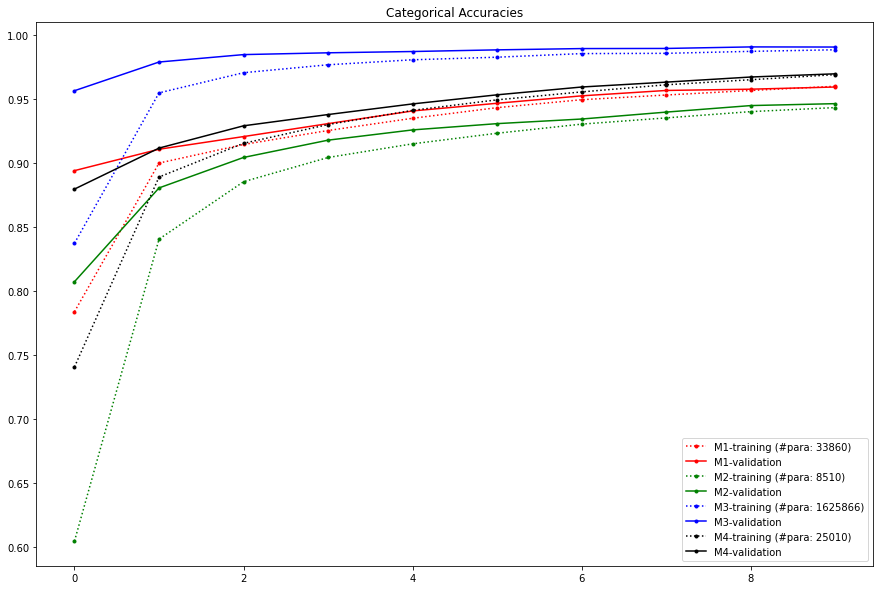

In [23]:
plt.plot(history1.history['categorical_accuracy'],     'r.:', label="M1-training (#para: %i)" % model1.count_params())
plt.plot(history1.history['val_categorical_accuracy'], 'r.-', label="M1-validation")

plt.plot(history2.history['categorical_accuracy'],     'g.:', label="M2-training (#para: %3i)" % model2.count_params())
plt.plot(history2.history['val_categorical_accuracy'], 'g.-', label="M2-validation")

plt.plot(history3.history['categorical_accuracy'],     'b.:', label="M3-training (#para: %i)" % model3.count_params())
plt.plot(history3.history['val_categorical_accuracy'], 'b.-', label="M3-validation")

plt.plot(history4.history['categorical_accuracy'],     'k.:', label="M4-training (#para: %i)" % model4.count_params())
plt.plot(history4.history['val_categorical_accuracy'], 'k.-', label="M4-validation")

plt.title("Categorical Accuracies")

plt.legend()
plt.show()
